<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Visualization Lab**


Estimated time needed: **45 to 60** minutes


In this assignment you will be focusing on the visualization of data.

The data set will be presented to you in the form of a RDBMS.

You will have to use SQL queries to extract the data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition of data.

-   Visualize comparison of data.


<hr>


## Demo: How to work with database


Download database file.


In [1]:
import requests
fname = 'm4_survey_data.sqlite'
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite'
r = requests.get(url)
open(fname , 'wb').write(r.content)

36679680

Connect to the database.


In [67]:
import sqlite3
conn = sqlite3.connect("m4_survey_data.sqlite") # open a database connection

Import pandas module.


In [68]:
import pandas as pd

## Demo: How to run an sql query


In [4]:
# print how many rows are there in the table named 'master'
QUERY = """
SELECT COUNT(*)
FROM master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
df.head()

,COUNT(*)
0,11398


## Demo: How to list all tables


In [5]:
# print all the tables names in the database
QUERY = """
SELECT name as Table_Name FROM
sqlite_master WHERE
type = 'table'
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
pd.read_sql_query(QUERY,conn)


,Table_Name
0,EduOther
1,DevType
2,LastInt
3,JobFactors
4,WorkPlan
5,WorkChallenge
6,LanguageWorkedWith
7,LanguageDesireNextYear
8,DatabaseWorkedWith
9,DatabaseDesireNextYear


## Demo: How to run a group by query


In [6]:
QUERY = """
SELECT Age,COUNT(*) as count
FROM master
group by age
order by age
"""
pd.read_sql_query(QUERY,conn)

,Age,count
0,NaN,287
1,16.0,3
2,17.0,6
3,18.0,29
4,19.0,78
5,20.0,109
6,21.0,203
7,22.0,406
8,23.0,581
9,24.0,679


## Demo: How to describe a table


In [ ]:
table_name = 'master'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])

# Hands-on Lab


## Visualizing distribution of data


### Histograms


Plot a histogram of `ConvertedComp.`


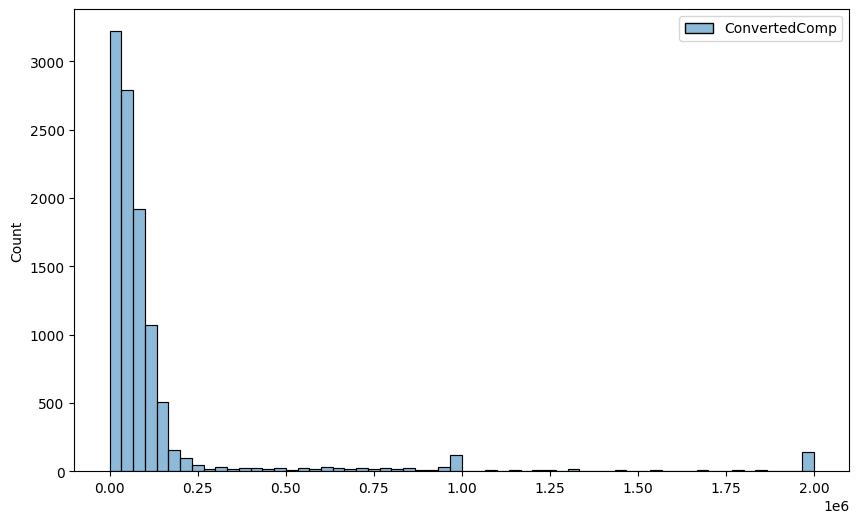

In [11]:
# your code goes here
QUERY = """
SELECT ConvertedComp
FROM master
"""
converted_comp = pd.read_sql_query(QUERY,conn)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.histplot(converted_comp, color='blue', bins=60)

plt.show()

### Box Plots


Plot a box plot of `Age.`


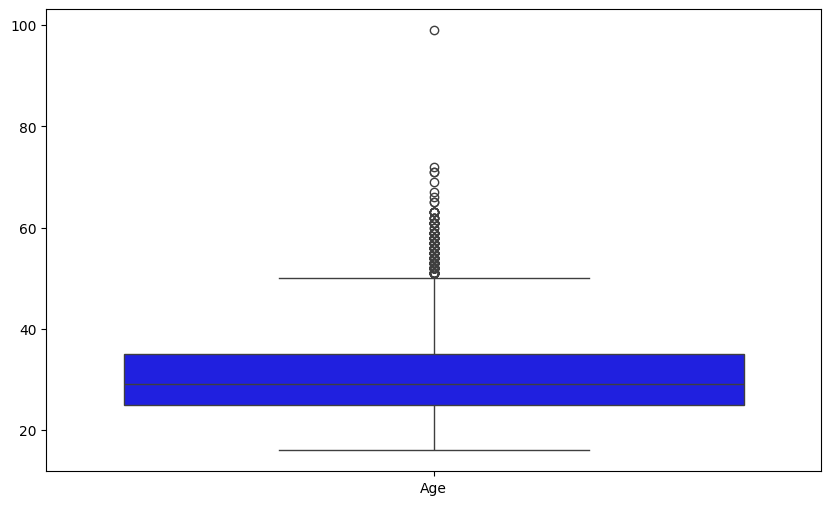

In [12]:
# your code goes here
QUERY = """
SELECT Age
FROM master
"""
age_plot = pd.read_sql_query(QUERY,conn)

plt.figure(figsize=(10,6))
sns.boxplot(age_plot, color='blue')

plt.show()


## Visualizing relationships in data


### Scatter Plots


Create a scatter plot of `Age` and `WorkWeekHrs.`


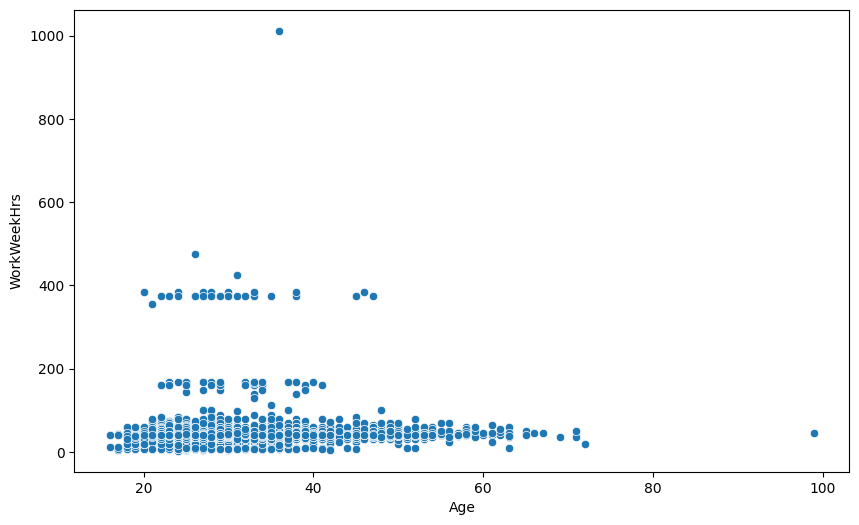

In [13]:
# your code goes here
QUERY = """
SELECT Age, WorkWeekHrs
FROM master
"""

age_work = pd.read_sql_query(QUERY, conn)

plt.figure(figsize=(10,6))
sns.scatterplot(age_work, x='Age', y='WorkWeekHrs')

plt.show()


### Bubble Plots


Create a bubble plot of `WorkWeekHrs` and `CodeRevHrs`, use `Age` column as bubble size.


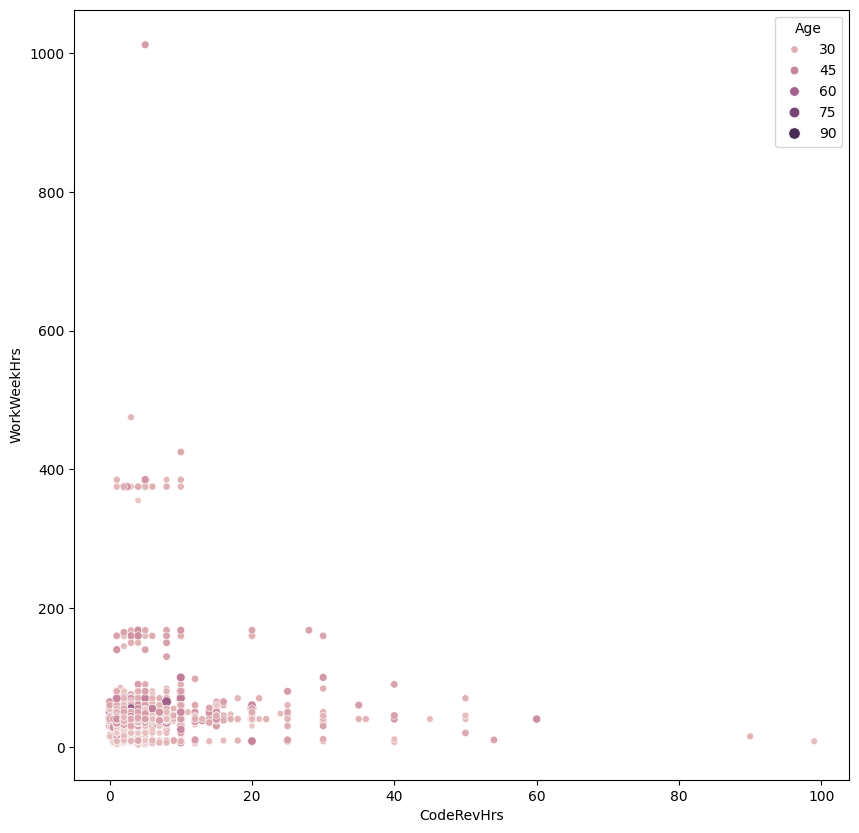

In [24]:
# your code goes here
QUERY = """
SELECT WorkWeekHrs, CodeRevHrs, Age
FROM master
"""

work_code = pd.read_sql_query(QUERY, conn)

plt.figure(figsize=(10,10))
sns.scatterplot(data=work_code, x='CodeRevHrs', y='WorkWeekHrs', size='Age', hue='Age')

plt.show()

## Visualizing composition of data


### Pie Charts


Create a pie chart of the top 5 databases that respondents wish to learn next year. Label the pie chart with database names. Display percentages of each database on the pie chart.


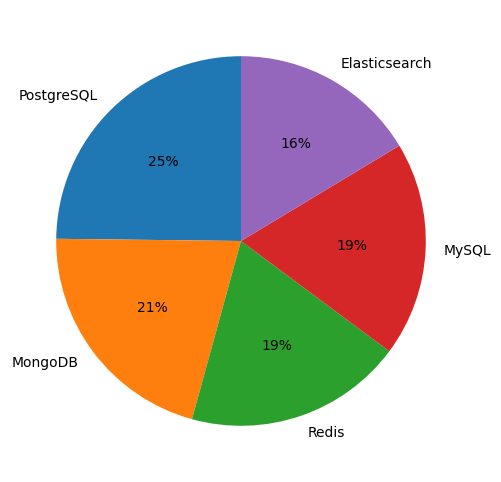

In [74]:
# your code goes here
QUERY = """
SELECT DatabaseDesireNextYear, COUNT(*)
FROM DatabaseDesireNextYear
GROUP BY DatabaseDesireNextYear
ORDER BY COUNT(*) DESC
LIMIT 5
"""

Database_next_year = pd.read_sql_query(QUERY, conn)
plt.figure(figsize=(10,6))
plt.pie(Database_next_year['COUNT(*)'], labels=Database_next_year['DatabaseDesireNextYear'], autopct='%.0f%%', startangle=90)

plt.show()

In [76]:
QUERY = """
SELECT LanguageDesireNextYear, COUNT(*)
FROM LanguageDesireNextYear
GROUP BY LanguageDesireNextYear
ORDER BY COUNT(*) DESC
"""

language_next_year = pd.read_sql_query(QUERY, conn)
language_next_year.head(5)

,LanguageDesireNextYear,COUNT(*)
0,JavaScript,6630
1,HTML/CSS,5328
2,Python,5239
3,SQL,5012
4,TypeScript,4088


In [88]:
QUERY = """
SELECT LanguageWorkedWith, COUNT(*)
FROM LanguageWorkedWith
GROUP BY LanguageWorkedWith
"""

sql = pd.read_sql_query(QUERY, conn)
sql[sql['LanguageWorkedWith']=='SQL']

,LanguageWorkedWith,COUNT(*)
22,SQL,7106


In [91]:
QUERY = """
SELECT DatabaseWorkedWith
FROM DatabaseWorkedWith
"""

mysql = pd.read_sql_query(QUERY, conn)
mysql['DatabaseWorkedWith'].unique()

array(['MySQL', 'SQLite', 'DynamoDB', 'PostgreSQL', 'Couchbase',
       'Firebase', 'MongoDB', 'Microsoft SQL Server', 'Elasticsearch',
       'MariaDB', 'Oracle', 'Redis', 'Other(s):', 'Cassandra'],
      dtype=object)

### Stacked Charts


Create a stacked chart of median `WorkWeekHrs` and `CodeRevHrs` for the age group 30 to 35.


<Figure size 1000x600 with 0 Axes>

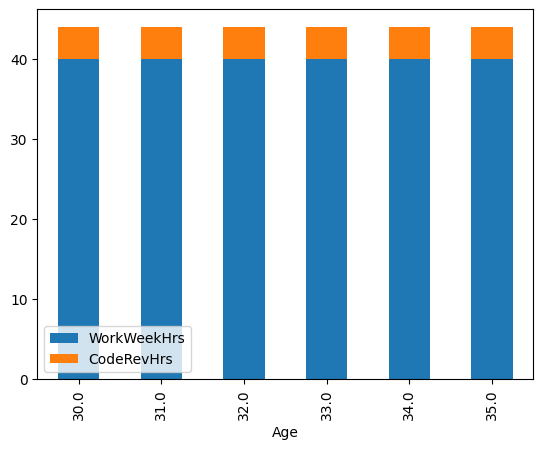

In [50]:
# your code goes here
QUERY = """
SELECT WorkWeekHrs, CodeRevHrs, Age
FROM master
WHERE Age>=30 AND Age<=35
"""
stacked_chart = pd.read_sql_query(QUERY, conn)
group_stacked = stacked_chart.groupby('Age', as_index=False)[['WorkWeekHrs', 'CodeRevHrs']].median()

plt.figure(figsize=(10,6))
group_stacked.plot(kind='bar', stacked=True, x='Age')

plt.show()

## Visualizing comparison of data


### Line Chart


Plot the median `ConvertedComp` for all ages from 45 to 60.


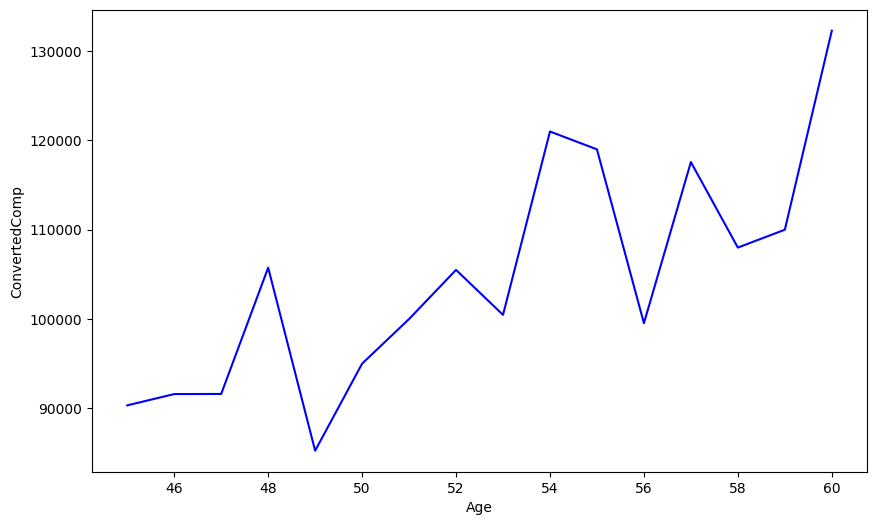

In [95]:
# your code goes here
QUERY = """
SELECT ConvertedComp, Age
FROM master
WHERE Age>=45 AND Age<=60
"""

convertedcomp_age = pd.read_sql_query(QUERY, conn)
grouped_comp_age = convertedcomp_age.groupby('Age', as_index=False)['ConvertedComp'].median()

plt.figure(figsize=(10,6))
sns.lineplot(data=grouped_comp_age, x='Age', y='ConvertedComp', color='blue')

plt.show()

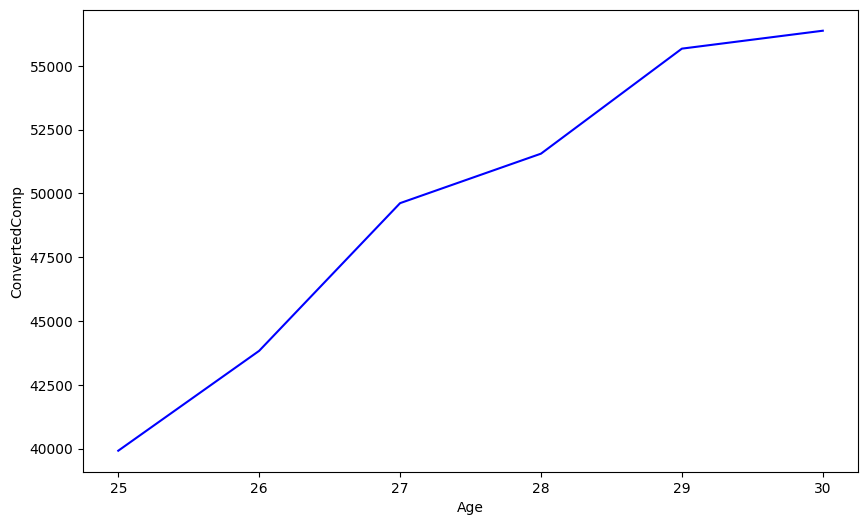

In [96]:
# your code goes here
QUERY = """
SELECT ConvertedComp, Age
FROM master
WHERE Age>=25 AND Age<=30
"""

convertedcomp_age = pd.read_sql_query(QUERY, conn)
grouped_comp_age = convertedcomp_age.groupby('Age', as_index=False)['ConvertedComp'].median()

plt.figure(figsize=(10,6))
sns.lineplot(data=grouped_comp_age, x='Age', y='ConvertedComp', color='blue')

plt.show()

### Bar Chart


Create a horizontal bar chart using column `MainBranch.`


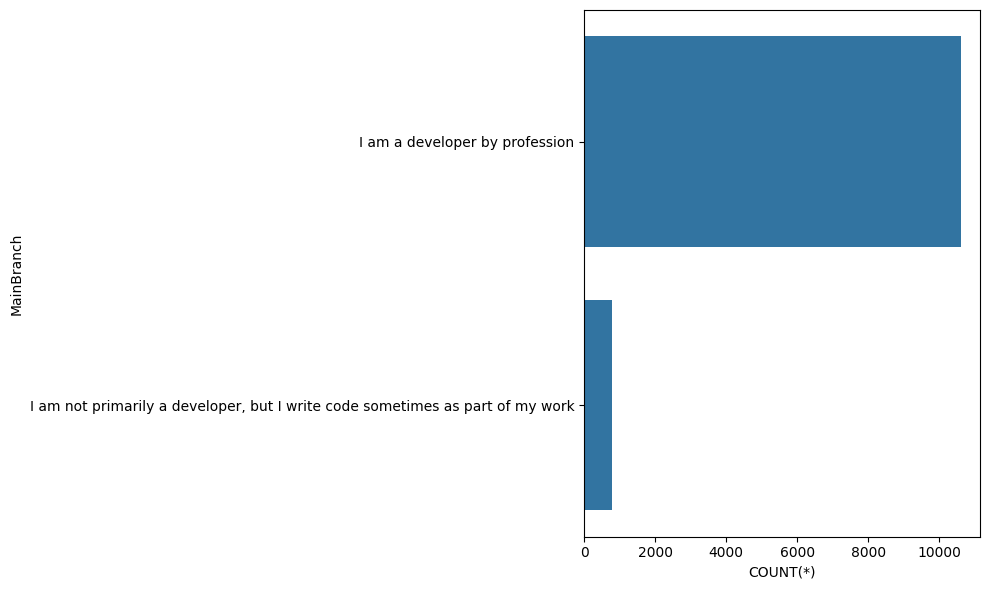

In [65]:
QUERY = """
SELECT MainBranch, COUNT(*)
from master
GROUP BY MainBranch
"""

mbr = pd.read_sql_query(QUERY,conn)

plt.figure(figsize=(10,6))
sns.barplot(data=mbr, x='COUNT(*)', y='MainBranch')

plt.tight_layout()

plt.show()

In [94]:
QUERY = """
SELECT DevType, COUNT(*)
FROM DevType
GROUP BY DevType
ORDER BY COUNT(*) DESC
LIMIT 5
"""

devtype = pd.read_sql_query(QUERY, conn)
devtype

,DevType,COUNT(*)
0,"Developer, full-stack",6928
1,"Developer, back-end",6290
2,"Developer, front-end",3920
3,"Developer, desktop or enterprise applications",2575
4,"Developer, mobile",1959


Close the database connection.


In [66]:
conn.close()

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
